# Unsupervised Learning Project - AllLife Bank Customer Segmentation
### Description
### Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

##  Exploratory Data Analysis
### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_excel("Credit+Card+Customer+Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

- The dataset has 660 rows and 7 columns.

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
df.columns.tolist()

['Sl_No',
 'Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

In [7]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

- All columns are of numerical data type.
- We will not need Sl_No column for analysis, so we can drop this column.
- There are no missing values.

In [8]:
# Dropping Sl_No column
df.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
# check for missing values
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the data set.

In [10]:
# statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


<IPython.core.display.Javascript object>

**Observations**
- Average Credit Limit of a customer is ~35K with maximum limit of 2 lakhs. This column seems to have outliers.
- The customers has 4 to 5 credit cards in average.
- It looks like the customers visiting the bank is less than the customers visiting online login, since average visit made by customer in person is 2.4 where as the average online visit is 2.6 yearly.
- Average calls made by a customers is 3.5 times yearly with the maximum of 10 times.

**Let's explore the unique values of the columns: Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made**

In [11]:
df.Total_Credit_Cards.value_counts(normalize=True) * 100

4     22.878788
6     17.727273
7     15.303030
5     11.212121
2      9.696970
1      8.939394
3      8.030303
10     2.878788
9      1.666667
8      1.666667
Name: Total_Credit_Cards, dtype: float64

<IPython.core.display.Javascript object>

- 22% of the customers has 4 credit cards.

In [12]:
df.Total_visits_bank.value_counts(normalize=True) * 100

2    23.939394
1    16.969697
0    15.151515
3    15.151515
5    14.848485
4    13.939394
Name: Total_visits_bank, dtype: float64

<IPython.core.display.Javascript object>

- 23% of the customers visits bank 2 times.
- 42% of the customers visits bank less than 5 times.

In [13]:
df.Total_visits_online.value_counts(normalize=True) * 100

2     28.636364
0     21.818182
1     16.515152
4     10.454545
5      8.181818
3      6.666667
15     1.515152
7      1.060606
10     0.909091
12     0.909091
8      0.909091
11     0.757576
13     0.757576
9      0.606061
14     0.151515
6      0.151515
Name: Total_visits_online, dtype: float64

<IPython.core.display.Javascript object>

- Nearly 45% of the customers visits online login less than or equal to 2 times.

In [14]:
df.Total_calls_made.value_counts(normalize=True) * 100

4     16.363636
0     14.696970
2     13.787879
1     13.636364
3     12.575758
6      5.909091
7      5.303030
9      4.848485
8      4.545455
5      4.393939
10     3.939394
Name: Total_calls_made, dtype: float64

<IPython.core.display.Javascript object>

- 16% of the customers made calls to bank 4 times a year.

## Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Avg_Credit_Limit

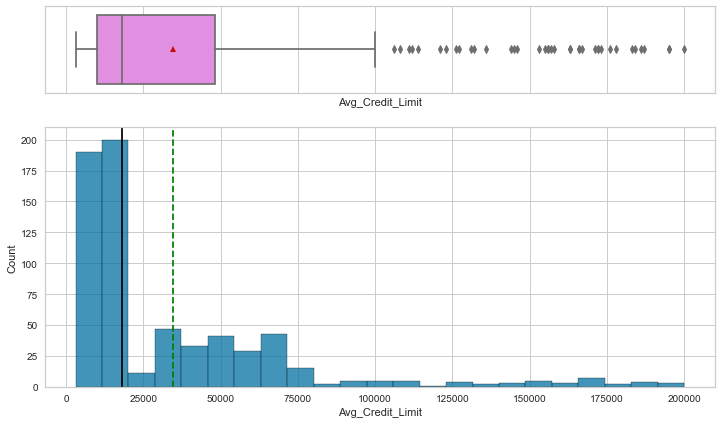

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Avg_Credit_Limit")

- The distribution is skewed towards right.
- More outliers are seen in box plot.
- Most of the customers have credit limit below 50K in range of 10K to 48K.
- Customers with credit limit more than 1 lakh is considered as outliers.

### Observations on Total_Credit_Cards

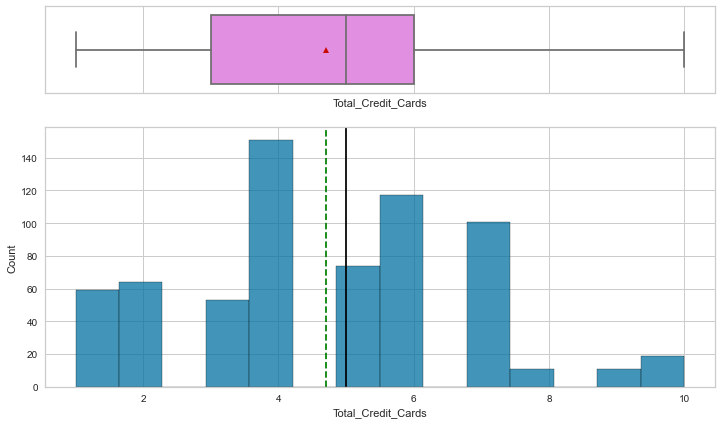

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Total_Credit_Cards")

- The distribution is close to normal. Mean and median is close to each other.
- Most of customers have 3 to 6 credit cards with an average of 5 cards.

### Observations on Total_visits_bank

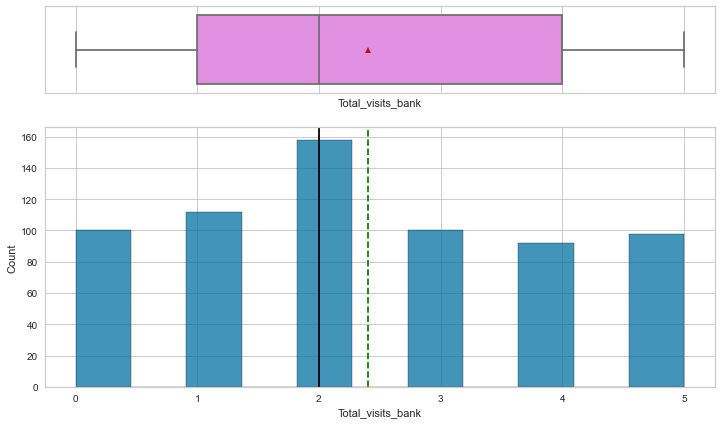

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Total_visits_bank")

- The distribution is close normal.
- Most of customers visits bank 1 to 4 times yearly with an average of 2.4 times.

### Observations on Total_visits_online	

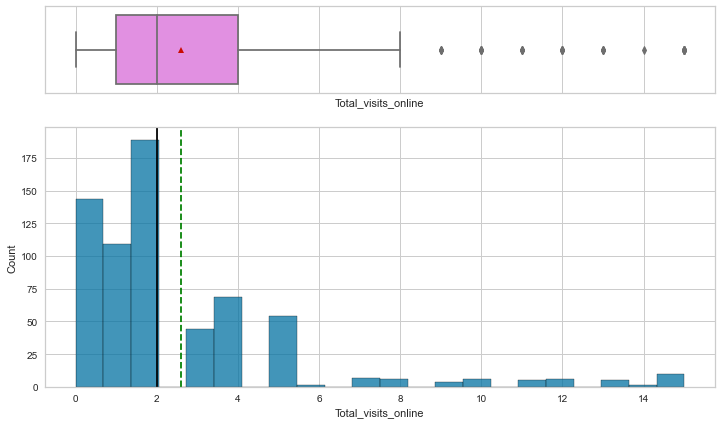

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Total_visits_online")

- The distribution is skewed towards right.
- Outliers are seen in boxplot in right.
- Most of the customers uses online login 1 to 4 times yearly and few customers uses online login more than 8 times yearly and those cutomers are considered as outliers.

### Observations on Total_calls_made

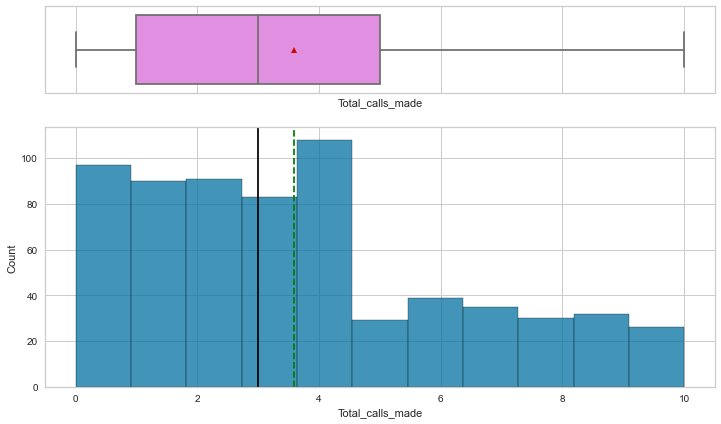

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Total_calls_made")

- The distribution is slightly skewed towards right.
- Number of calls made by most of the customers is 1 to 5 times yearly.
- Few customers contacted bank more than 6 times with the maximum of 10 times yearly.

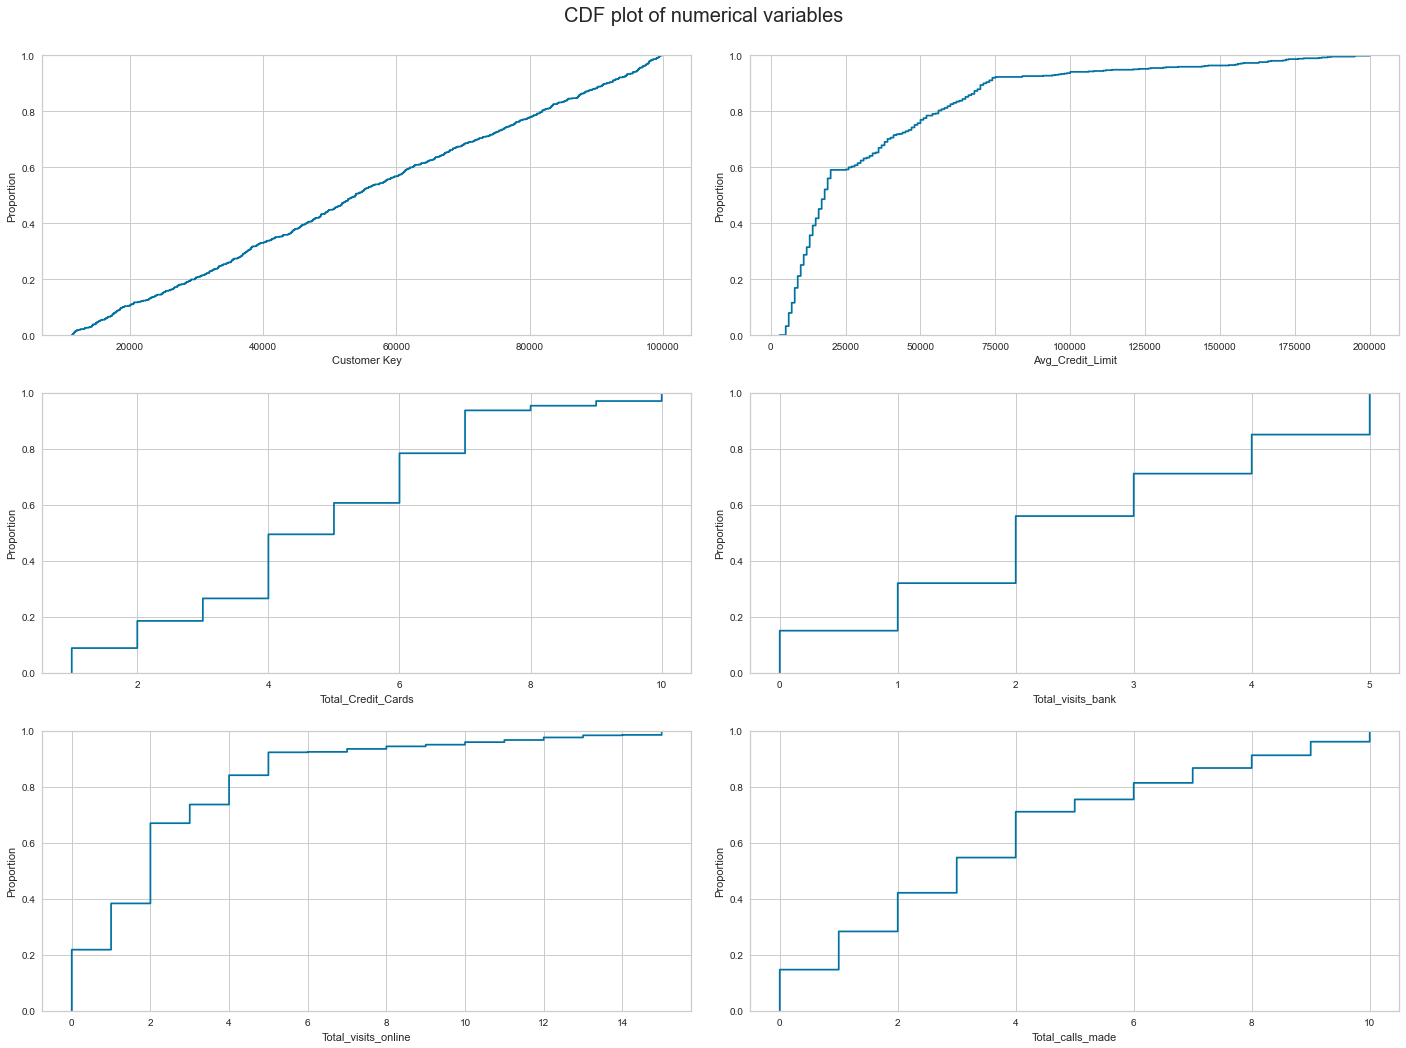

<IPython.core.display.Javascript object>

In [21]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 6:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- 60% of customers have have an average credit limit of $25,000.
- 80% of customers have 6 credit cards.
- 80% of customers have at least 4 visits to the bank and at least 4 visits to online.
- 80% of customer have made at least 6 calls to the bank.

### Histogram of numerical variables

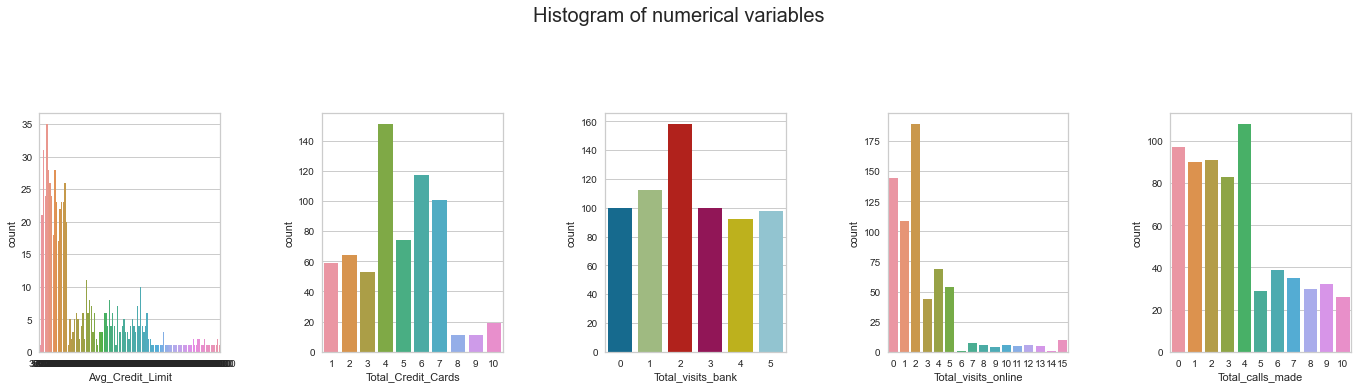

<IPython.core.display.Javascript object>

In [22]:
# histograms for individual variables
all_col = df.iloc[:, 1:].columns.tolist()
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle("Histogram of numerical variables", fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii], x=df[all_col[counter]])
    counter = counter + 1

fig.tight_layout(pad=4.0)

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

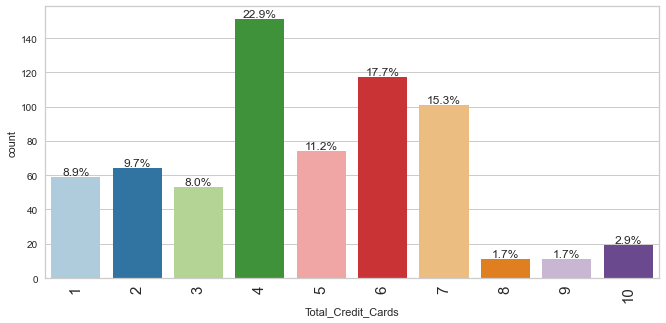

<IPython.core.display.Javascript object>

In [24]:
# let's explore average credit limit further
labeled_barplot(df, "Total_Credit_Cards", perc=True)

- Nearly 70% of the customers have 4 to 7 credit cards.
- Only 30% of the customers have credit cards less than 3 and greater than 8 cards.

## Bivariate Analysis

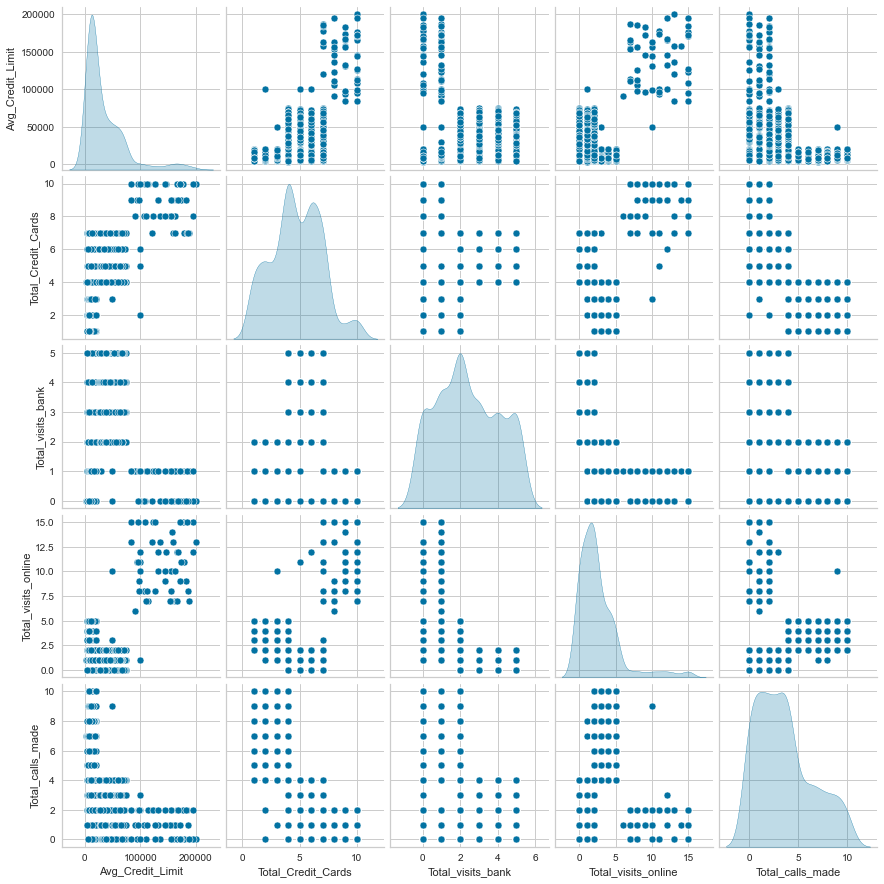

<IPython.core.display.Javascript object>

In [25]:
# The bivariate plots below are useful to see what amount of feature interaction is present.
sns.pairplot(
    df[
        [
            "Avg_Credit_Limit",
            "Total_Credit_Cards",
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
        ]
    ],
    diag_kind="kde",
)
plt.show()

- There are no high correlation seen between any of the variables.

<AxesSubplot:>

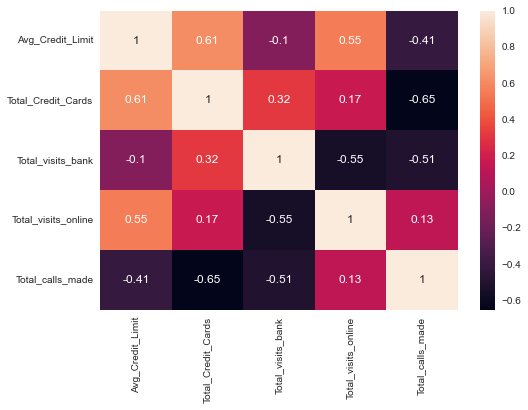

<IPython.core.display.Javascript object>

In [26]:
# Correlation
sns.heatmap(
    df[
        [
            "Avg_Credit_Limit",
            "Total_Credit_Cards",
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
        ]
    ].corr(),
    annot=True,
)

- The average credit limit and total number of credit cards are highly positively correlated, which is obvious.
- Total visits online has medium correlation with the average credit limit which is interesting.
- Total credit cards is somewhat negativly correlated with total credit cards which indicates that customers who make fewer calls to the bank tend to have less total credit cards.

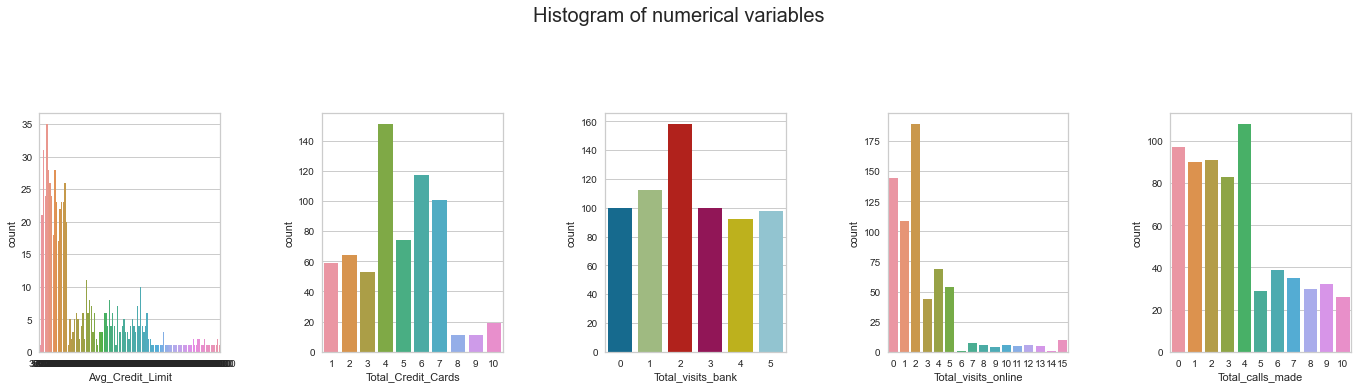

<IPython.core.display.Javascript object>

In [27]:
# histograms for individual variables
all_col = df.iloc[:, 1:].columns.tolist()
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle("Histogram of numerical variables", fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii], x=df[all_col[counter]])
    counter = counter + 1

fig.tight_layout(pad=4.0)

## Inights form EDA

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values. 
- All columns are of int64 data type.
- There are no missing values.
- Credit limit average is around 35K with 50% of customers having a credit limit less than 18K, which implies a high positive skewness.
- Looking at standard deviation, we can see a considerably high variation in credit limits as well.
- On average, credit cards owned by each customer are ~5. Some customers have 10.
- On average, most customer interactions are through calls, then online. Also, some customers never contacted/visited the bank.
- There is no high correlation found between any two variables in bivariate analysis which is good for clustering the data into different customer groups or segments.

## Data Preprocessing

### Missing Value Treatment

In [28]:
# check for any missing values
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

- There is no missing values in our dataset.

### Feature Engineering

In [29]:
# let's check the no of unique values in each column
df.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

* Customer key column has unique values for each customers. This column has duplicate entries since our data set has total of 660 observations.

In [30]:
# let's check for duplicate entries in Customer key column
df["Customer Key"].duplicated().sum()

5

<IPython.core.display.Javascript object>

#### Duplicate observations check

In [31]:
# let's check the duplicate entries in the dataset
df[df["Customer Key"].duplicated() == True]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

- Customer key is unique to the customer but Sl_No is not unique, it is generated by the system while adding new details.
- So, lets check the Sl_No for this duplicate data using the original dataset.

In [32]:
# check for duplicated entries in original data and compare the sl_no
data[data["Customer Key"].duplicated(keep=False) == True]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

**Observations**
- The duplicate records for Customer Key don't match up, this may be that a record was added to the database when the intent was actually to update an existing record, another possibility may be that these are cases of identity theft, or possibly just joint accounts where the Customer Key is shared but not the Sl_No.
- So, we are not going to remove the duplicate records from the dataset.

### Outlier Treatment

In [33]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [34]:
(
    (df.select_dtypes(include=["int64"]) < lower)
    | (df.select_dtypes(include=["int64"]) > upper)
).sum() / len(data) * 100

Avg_Credit_Limit       5.909091
Customer Key           0.000000
Sl_No                  0.000000
Total_Credit_Cards     0.000000
Total_calls_made       0.000000
Total_visits_bank      0.000000
Total_visits_online    5.606061
dtype: float64

<IPython.core.display.Javascript object>

**After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (Avg_Credit_Limit and Total_visits_online) and we would want our model to learn the underlying pattern for such customers.**

### Prepare the data for analysis

In [35]:
# let's drop customer key column as it is unique for each customer before clustering
df.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [36]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

In [37]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [38]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-Means Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429889401411244
Number of Clusters: 7 	Average Distortion: 0.9095816008505434
Number of Clusters: 8 	Average Distortion: 0.8899597431476464


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

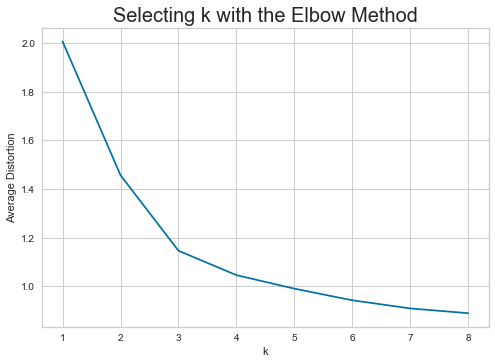

<IPython.core.display.Javascript object>

In [39]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- The appropriate value of k from the elbow curve seems to be 3 or 4.

### Let's check the silhouette scores**

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.25545029453623114
For n_clusters = 7, silhouette score is 0.24813898838486073
For n_clusters = 8, silhouette score is 0.22687481470472748
For n_clusters = 9, silhouette score is 0.22242027761742958


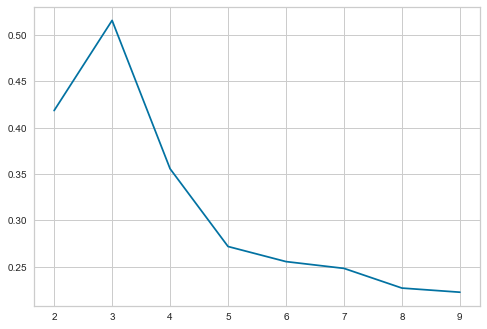

<IPython.core.display.Javascript object>

In [40]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- From the silhouette scores, it seems that 7 is a good value of k.

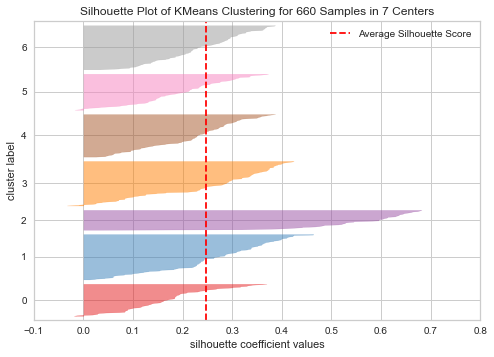

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

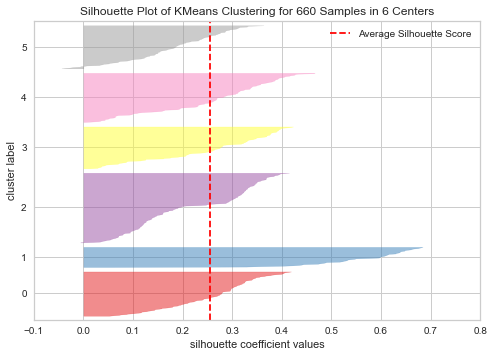

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

- Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.

In [43]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [44]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [45]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [46]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [47]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12167.420814,2.393665,0.927602,3.574661,6.923077,221
1,31226.315789,5.478947,4.515789,1.010526,1.936842,190
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,35904.522613,5.522613,2.477387,0.969849,2.075377,199


<IPython.core.display.Javascript object>

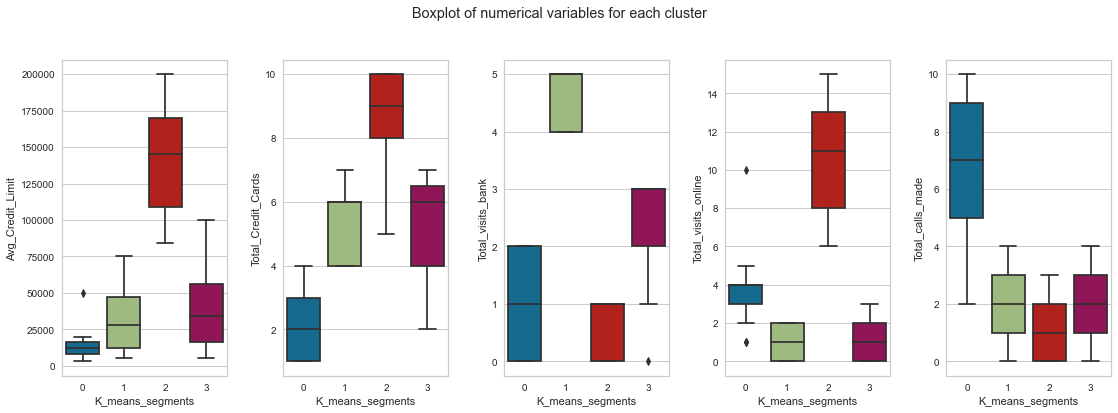

<IPython.core.display.Javascript object>

In [48]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Observations**
- `Cluster 0`:
    - This cluster belongs to customers with least average credit limit and least number of credit cards.
    - But, these customers made highest number of calls to the bank.
    - Online visit by these customers are pretty low when compared to cluster 2.
- `Cluster 1`:
    - Customers in this cluster has highest visit to the bank but least in online visits.
- `Cluster 2`:
    - Customers in this cluster has highest average credit limit, highest total number of credit cards and highest total visits online.
    - However, these customers are least in total visits to bank and total calls made.
- `Cluster 3`:
    - Customers in this cluster belongs to second highest average credit limit and number of credit cards.
    - Customers in this cluster visited bank more than online visits.
    - Customers made calls similar to cluster 1.

## Hierarchical Clustering

In [49]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

<IPython.core.display.Javascript object>

In [50]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


<IPython.core.display.Javascript object>

In [52]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Observations**

- We see that the cophenetic correlation is maximum with cityblock distance, which is the Manhattan distance, and average linkage.
- The cophenetic correlation with Euclidean distance and average linkage is just barely less than the combination with maximum cophenetic correlation.

### Let's see the dendrograms for the different linkage methods

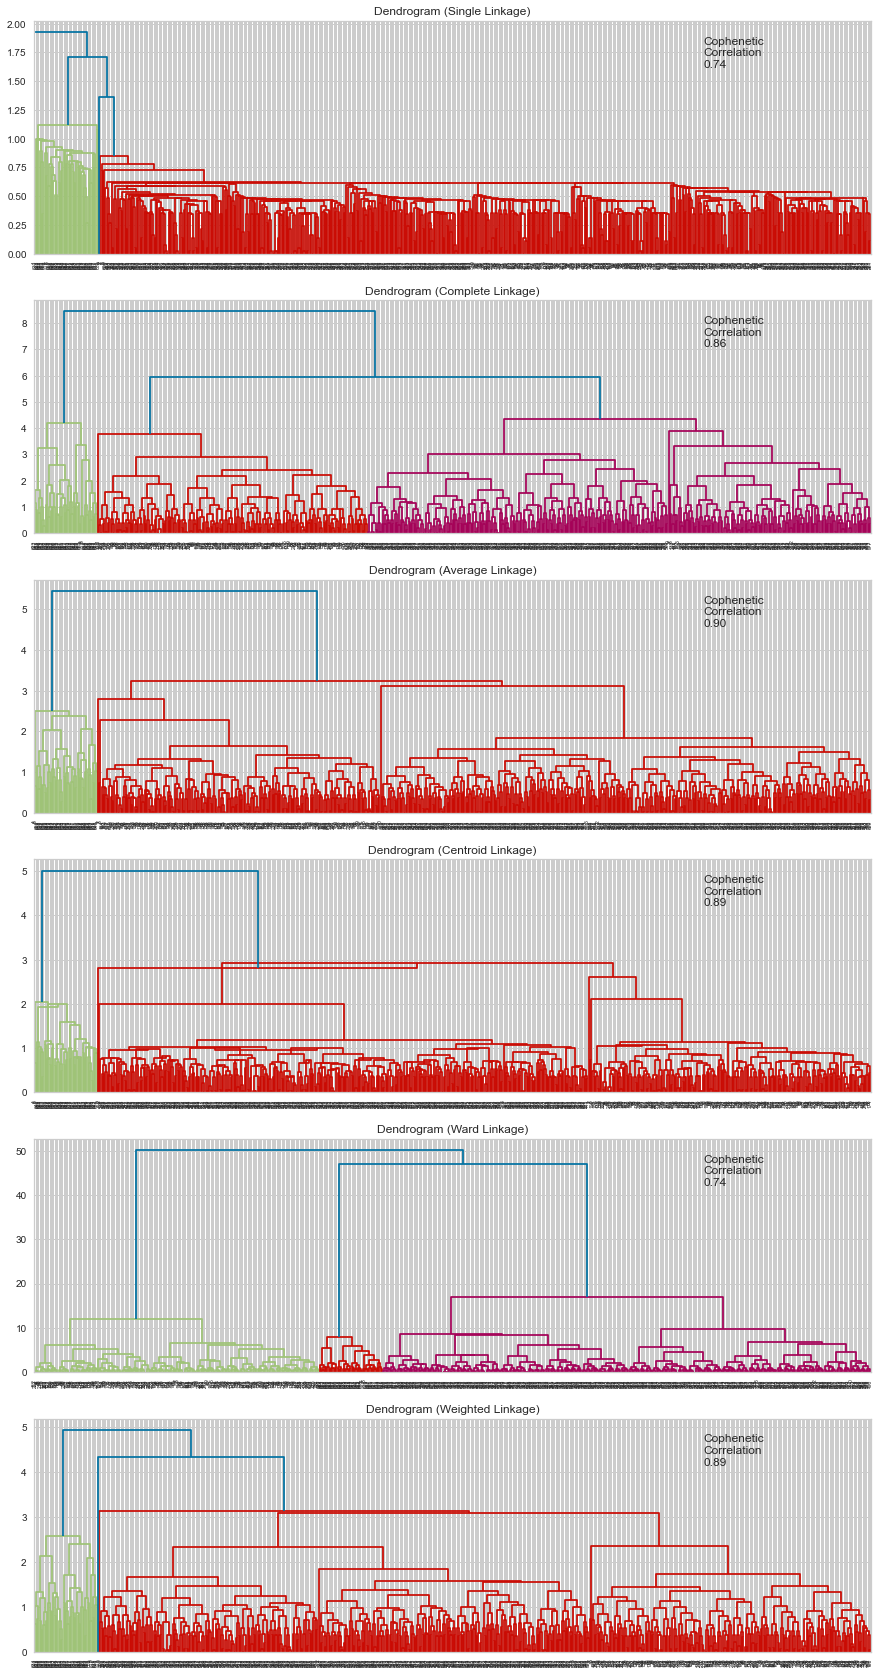

<IPython.core.display.Javascript object>

In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Complete and Ward linkage shows distinct and separate clusters.

In [54]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


<IPython.core.display.Javascript object>

**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

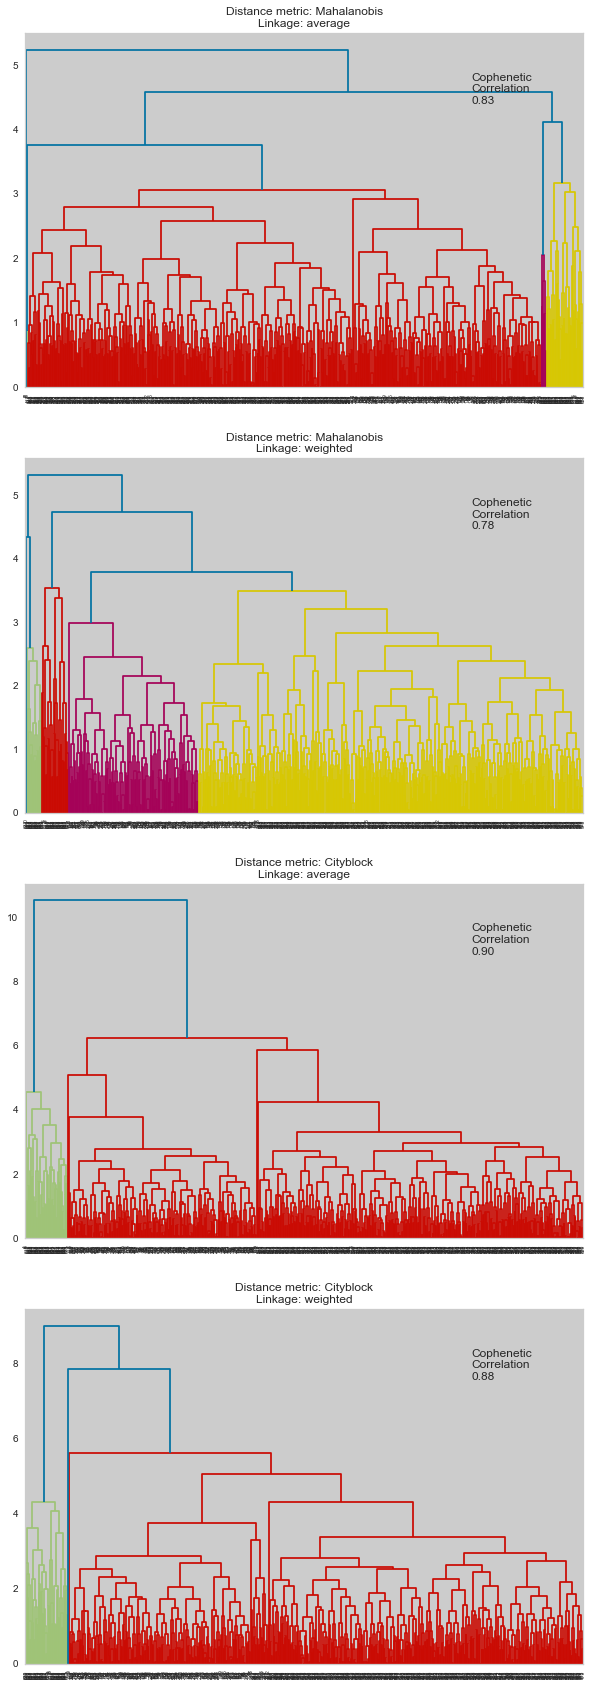

<IPython.core.display.Javascript object>

In [55]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Complete linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with Complete linkage method.

### Let's create 3 clusters.

In [56]:
HCmodel = AgglomerativeClustering(
    n_clusters=3, affinity="euclidean", linkage="complete"
)
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

<IPython.core.display.Javascript object>

In [57]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [58]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [59]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [60]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,1.974811,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,0.014085,213


<IPython.core.display.Javascript object>

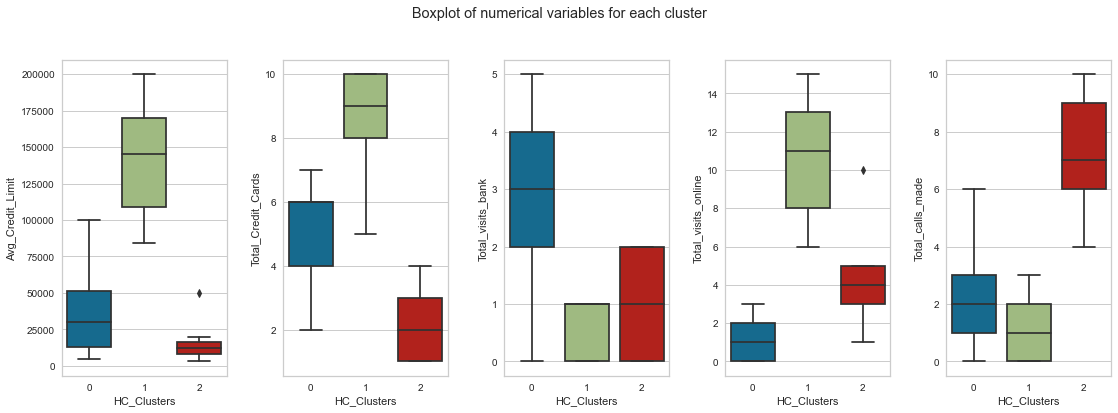

<IPython.core.display.Javascript object>

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights


- **`Cluster 0`**:
    - This cluster contains people with the second highest average credit limit and total number of credit cards.
    - Customers in this cluster have the highest number of total visits to the bank but the lowest total visits online.
    
    
- **`Cluster 1`**:
    - This cluster contains people with the highest average credit limit and with an average of 8.74 credit cards.
    - Customers in this cluster has the highest total number of credit cards more than 8 cards.
    - Total visits to the bank is lowest for customers in this cluster.
    - However, people in this cluster have the highest total number of visits online.
   
   
- **`Cluster 2`**:
    - This cluster contains customers with the lowest average credit limit and the lowest number of credit cards. Average visits to the bank is also pretty low.
    - While the total visits online is lower than the first cluster of people, total calls made is the highest for this cluster.

## Comparisons
- **K-Means and HC methods differed in between recommending 4 and 3 clusters.**
- Cluster 2 of K-Means is same observations as Cluster 1 in HC methods, both has 50 observations.
- Cluster 0(with 221 observation) of K-Means has similar observations as Cluster 2 in HC methods(213 observations). 
- However, the clustering results between the two were not all that different.
- Both contained clusters with customers that contained highest results for average credit limit and having the highest number of credit cards out of all the clusters.

## Business Recommendations
- Cluster 0 contains customers with mid level average credit limit and total number of credit cards. Based on this data, personalized campaigns should be done to target new customers.
- Cluster 1 contains those with the highest average credit limit and ~8 credit cards. Therefore, marketing should be done for customers that have an average of 8 credit cards to upsell to existing customers.
- Cluster 2 contains customers who made highest calls to the bank. So, these customers should be targetted to upgrade the service delivery model, to ensure that customer queries are resolved faster.